In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Cargar el archivo CSV en un DataFrame
df_sueldos = pd.read_csv("sueldos_del_2012_en_adelante.csv")
# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df_sueldos.head())

  CUIL   AÑO MES                              NOMBRE              DESC_REP  \
0  NaN  2012   1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012   1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012   1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012   1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012   1              BULLRICH, ESTEBAN JOSE              MINISTRO   

  ASIGNACION    BRUTO OBSERVACIONES  
0     6300.0   5210.1           NaN  
1    52226.1  29346.8           NaN  
2    25080.0  13857.0           NaN  
3    25080.0  16054.0           NaN  
4    25080.0  15189.4           NaN  


In [23]:
# Limpiar los datos en las columnas 'ASIGNACION' y 'BRUTO'
df_sueldos['ASIGNACION'] = df_sueldos['ASIGNACION'].str.replace('$', '').str.replace(',', '.').fillna(0).astype(float)
df_sueldos['BRUTO'] = df_sueldos['BRUTO'].str.replace('$', '').str.replace(',', '.').fillna(0).astype(float)


In [24]:
# Reemplazar 'SETIEMBRE' por '9' en la columna 'MES'
df_sueldos['MES'] = df_sueldos['MES'].replace('SETIEMBRE', '9')


In [25]:
df_sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUIL           2042 non-null   object 
 1   AÑO            3883 non-null   int64  
 2   MES            3883 non-null   object 
 3   NOMBRE         3883 non-null   object 
 4   DESC_REP       3883 non-null   object 
 5   ASIGNACION     3883 non-null   float64
 6   BRUTO          3883 non-null   float64
 7   OBSERVACIONES  117 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 242.8+ KB


In [26]:
# Leer el archivo CSV en un DataFrame
df_dolar = pd.read_csv('dolarxmes.csv')
# Reemplazar el nombre de la columna 'valor' por 'dolar'
df_dolar = df_dolar.rename(columns={'valor': 'dolar'})
# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_dolar.head())

    año  mes  dolar
0  2012    1      4
1  2012    2      4
2  2012    3      4
3  2012    4      4
4  2012    5      4


In [27]:
# Convertir las columnas 'MES' y 'AÑO' del DataFrame df_sueldos en enteros
df_sueldos['MES'] = df_sueldos['MES'].astype(int)
df_sueldos['AÑO'] = df_sueldos['AÑO'].astype(int)

# Convertir las columnas 'año' y 'mes' del DataFrame df_dolar en enteros
df_dolar['año'] = df_dolar['año'].astype(int)
df_dolar['mes'] = df_dolar['mes'].astype(int)


In [28]:
# Combinar los DataFrames df_sueldos y df_dolar en función de las columnas 'AÑO' y 'MES'
df_sueldos_con_dolar = pd.merge(df_sueldos, df_dolar, left_on=['AÑO', 'MES'], right_on=['año', 'mes'], how='left')
# Eliminar las columnas 'año' y 'mes' (opcional, si se desean eliminar)
df_sueldos_con_dolar = df_sueldos_con_dolar.drop(columns=['año', 'mes'])
# Mostrar las primeras filas del DataFrame resultante
print(df_sueldos_con_dolar.head())

  CUIL   AÑO  MES                              NOMBRE              DESC_REP  \
0  NaN  2012    1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012    1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012    1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012    1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012    1              BULLRICH, ESTEBAN JOSE              MINISTRO   

   ASIGNACION    BRUTO OBSERVACIONES  dolar  
0      6300.0   5210.1           NaN      4  
1     52226.1  29346.8           NaN      4  
2     25080.0  13857.0           NaN      4  
3     25080.0  16054.0           NaN      4  
4     25080.0  15189.4           NaN      4  


In [29]:
df_sueldos_con_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUIL           2042 non-null   object 
 1   AÑO            3883 non-null   int64  
 2   MES            3883 non-null   int64  
 3   NOMBRE         3883 non-null   object 
 4   DESC_REP       3883 non-null   object 
 5   ASIGNACION     3883 non-null   float64
 6   BRUTO          3883 non-null   float64
 7   OBSERVACIONES  117 non-null    object 
 8   dolar          3883 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 273.1+ KB


In [30]:
# Calcular las columnas 'dolarAsignacion' y 'dolarBruto' en df_sueldos_con_dolar
df_sueldos_con_dolar['dolarAsignacion'] = df_sueldos_con_dolar['ASIGNACION'] / df_sueldos_con_dolar['dolar']
df_sueldos_con_dolar['dolarBruto'] = df_sueldos_con_dolar['BRUTO'] / df_sueldos_con_dolar['dolar']
# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_sueldos_con_dolar.head())

  CUIL   AÑO  MES                              NOMBRE              DESC_REP  \
0  NaN  2012    1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012    1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012    1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012    1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012    1              BULLRICH, ESTEBAN JOSE              MINISTRO   

   ASIGNACION    BRUTO OBSERVACIONES  dolar  dolarAsignacion  dolarBruto  
0      6300.0   5210.1           NaN      4         1575.000    1302.525  
1     52226.1  29346.8           NaN      4        13056.525    7336.700  
2     25080.0  13857.0           NaN      4         6270.000    3464.250  
3     25080.0  16054.0           NaN      4         6270.000    4013.500  
4     25080.0  15189.4           NaN      4         6270.000    3797.350  


In [31]:
df_sueldos = df_sueldos_con_dolar

In [32]:
# Crear una nueva columna "FECHA" combinando "AÑO" y "MES"
df_sueldos['FECHA'] = pd.to_datetime(df_sueldos['AÑO'].astype(str) + '-' + df_sueldos['MES'].astype(str), format='%Y-%m')

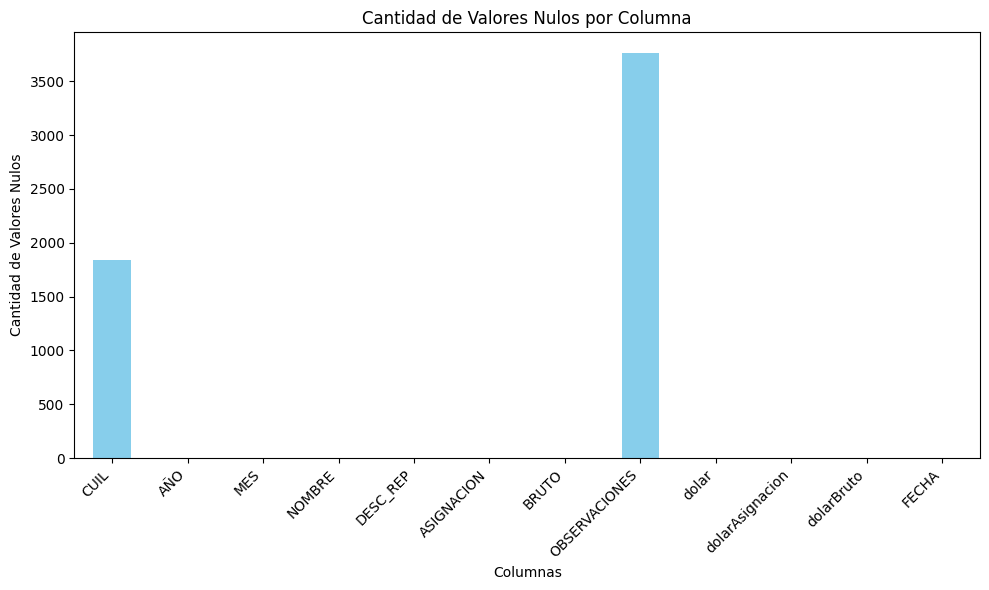

In [35]:
# Calcular la cantidad de valores nulos por columna
valores_nulos_por_columna = df_sueldos.isnull().sum()

# Crear un gráfico de barras para visualizar los valores nulos
plt.figure(figsize=(10, 6))
valores_nulos_por_columna.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


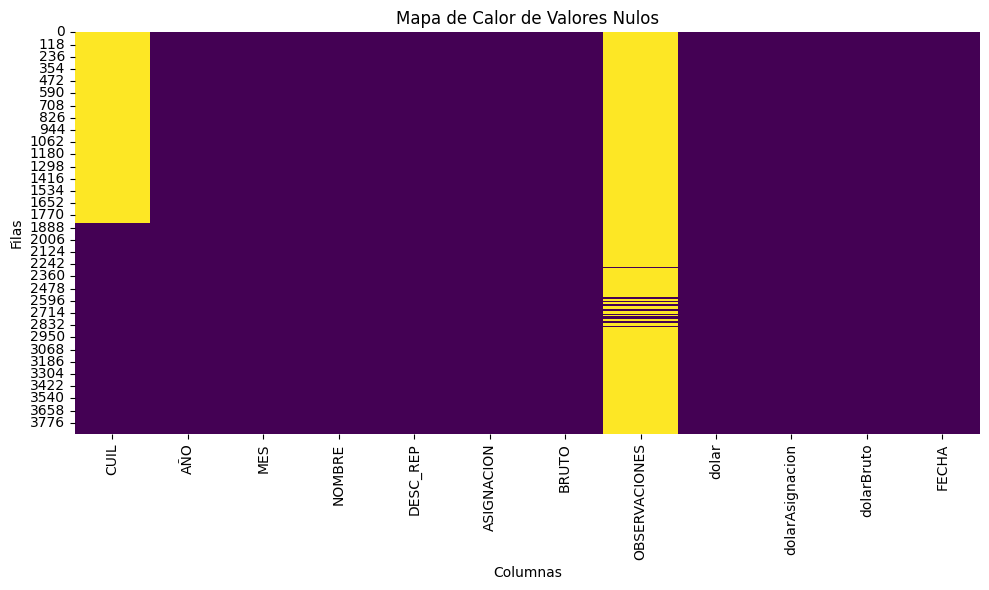

In [36]:
# Crear un mapa de calor de los valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_sueldos.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()

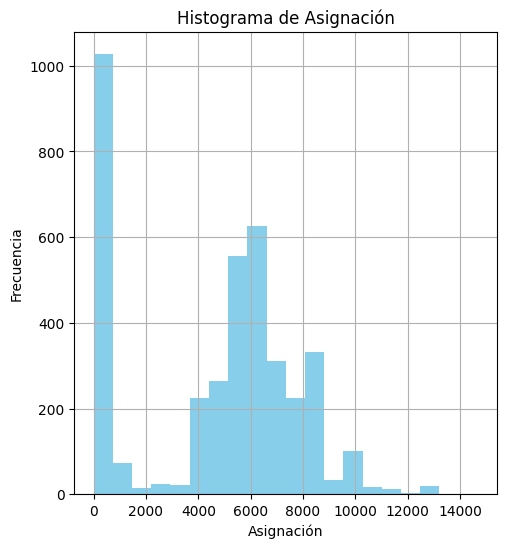

In [37]:
# Histogramas de 'ASIGNACION' y 'BRUTO'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_sueldos['dolarAsignacion'], bins=20, color='skyblue')
plt.title('Histograma de Asignación')
plt.xlabel('Asignación')
plt.ylabel('Frecuencia')
plt.grid(True)

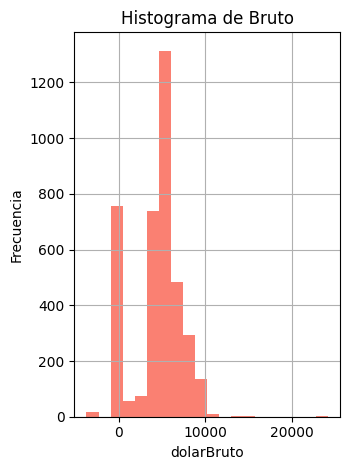

In [38]:

plt.subplot(1, 2, 2)
plt.hist(df_sueldos['dolarBruto'], bins=20, color='salmon')
plt.title('Histograma de Bruto')
plt.xlabel('dolarBruto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

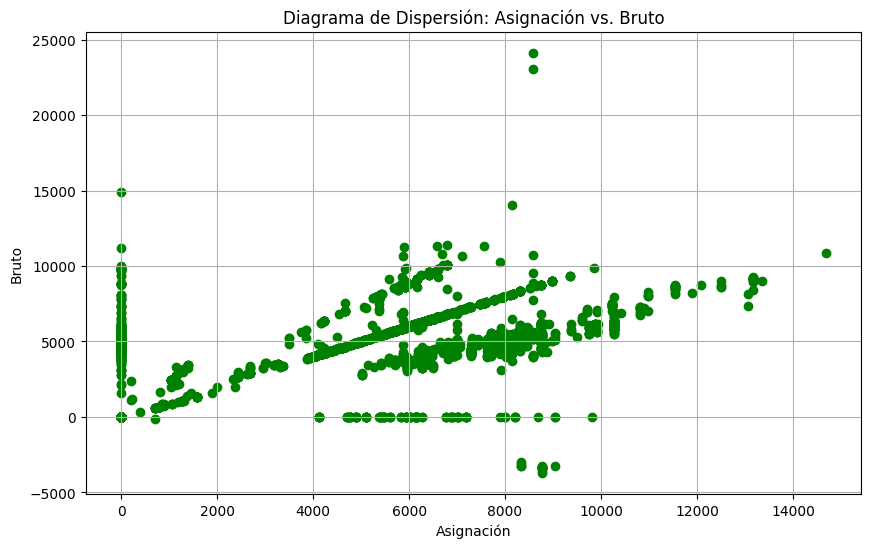

In [39]:
# Diagrama de dispersión de 'ASIGNACION' vs. 'BRUTO'
plt.figure(figsize=(10, 6))
plt.scatter(df_sueldos['dolarAsignacion'], df_sueldos['dolarBruto'], color='green')
plt.title('Diagrama de Dispersión: Asignación vs. Bruto')
plt.xlabel('Asignación')
plt.ylabel('Bruto')
plt.grid(True)
plt.show()

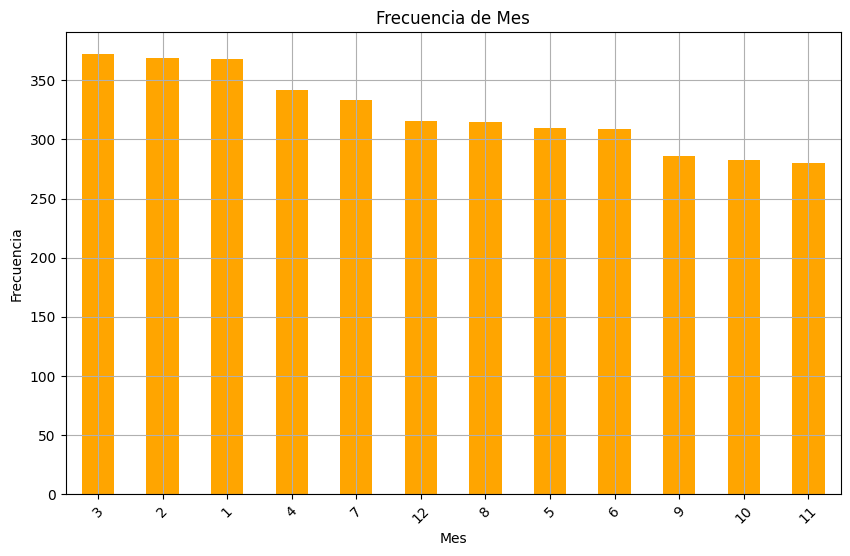

In [40]:
# Gráfico de barras de frecuencia de 'MES'
plt.figure(figsize=(10, 6))
df_sueldos['MES'].value_counts().plot(kind='bar', color='orange')
plt.title('Frecuencia de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_3776/194990858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑO', y='dolarAsignacion', data=df_sueldos, palette='Set2')
/tmp/ipykernel_3776/194990858.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑO', y='dolarBruto', data=df_sueldos, palette='Set2')


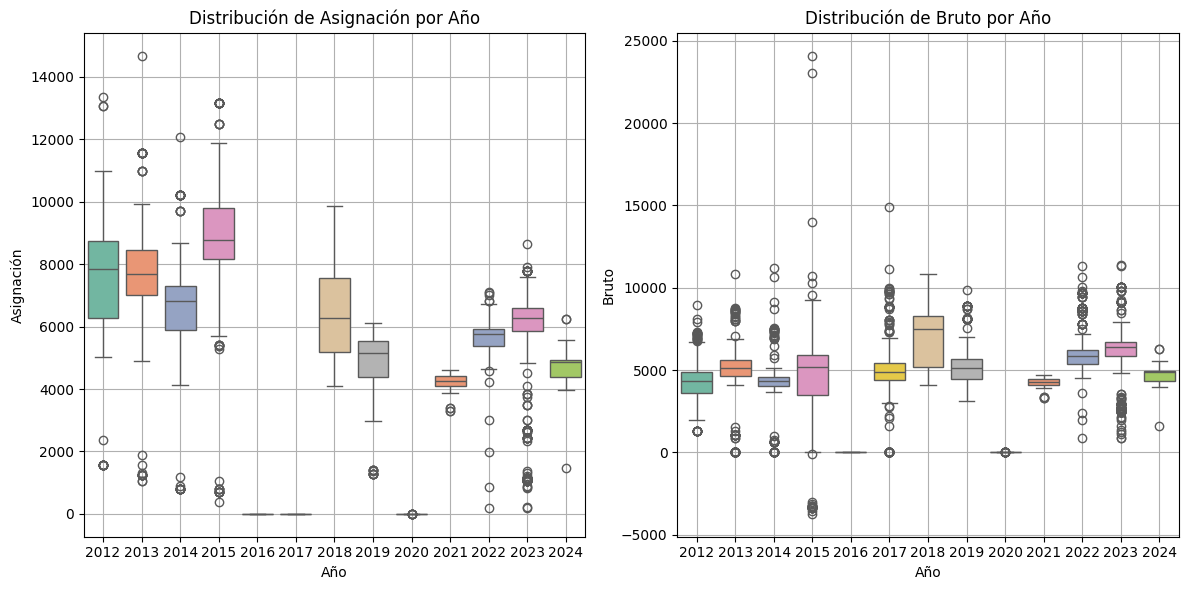

In [41]:
# Diagrama de caja de 'ASIGNACION' y 'BRUTO' por 'AÑO'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AÑO', y='dolarAsignacion', data=df_sueldos, palette='Set2')
plt.title('Distribución de Asignación por Año')
plt.xlabel('Año')
plt.ylabel('Asignación')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x='AÑO', y='dolarBruto', data=df_sueldos, palette='Set2')
plt.title('Distribución de Bruto por Año')
plt.xlabel('Año')
plt.ylabel('Bruto')
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
# Guardar el DataFrame df_sueldos_con_dolar en un archivo CSV llamado datossueldos.csv
df_sueldos_con_dolar.to_csv('datossueldos.csv', index=False)
# Confirmar que se ha guardado correctamente
print("El archivo datossueldos.csv se ha guardado correctamente.")


El archivo datossueldos.csv se ha guardado correctamente.


In [44]:
df_sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CUIL             2042 non-null   object        
 1   AÑO              3883 non-null   int64         
 2   MES              3883 non-null   int64         
 3   NOMBRE           3883 non-null   object        
 4   DESC_REP         3883 non-null   object        
 5   ASIGNACION       3883 non-null   float64       
 6   BRUTO            3883 non-null   float64       
 7   OBSERVACIONES    117 non-null    object        
 8   dolar            3883 non-null   int64         
 9   dolarAsignacion  3883 non-null   float64       
 10  dolarBruto       3883 non-null   float64       
 11  FECHA            3883 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 364.2+ KB


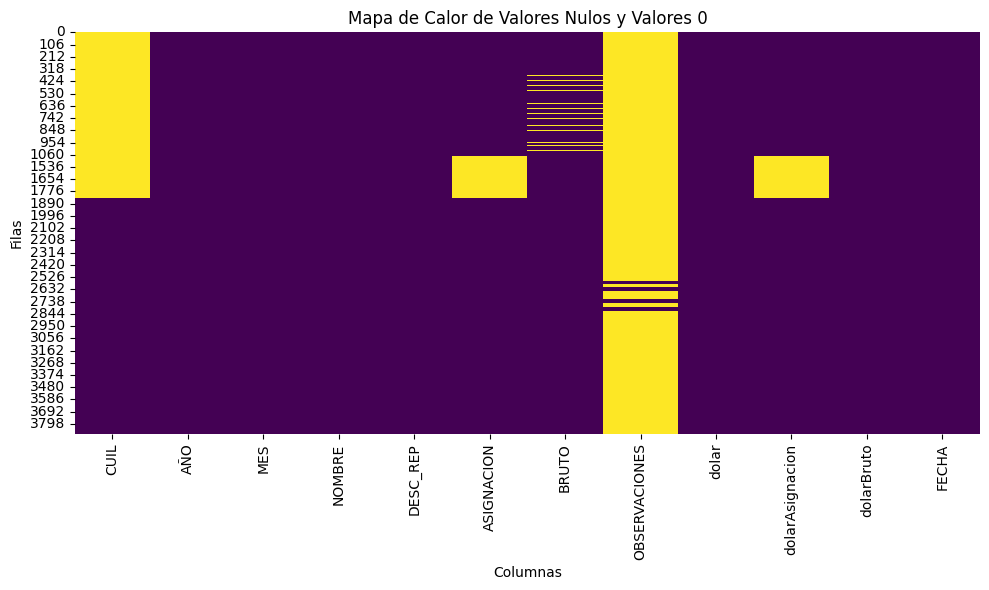

In [51]:
# Marcar los valores 0 como nulos para incluirlos en el mapa de calor
df_sueldos_reemplazado = df_sueldos.replace(0, pd.NA)
# Crear un mapa de calor de los valores nulos y los valores 0
plt.figure(figsize=(10, 6))
sns.heatmap(df_sueldos_reemplazado.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor de Valores Nulos y Valores 0')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()

In [48]:
# Eliminar filas con 0 en ambas columnas "ASIGNACION" y "BRUTO"
df_sueldos = df_sueldos[(df_sueldos['ASIGNACION'] != 0) | (df_sueldos['BRUTO'] != 0)]

In [50]:
df_sueldos['dolarBruto'] = df_sueldos.apply(lambda row: row['dolarAsignacion'] if row['dolarBruto'] == 0 else row['dolarBruto'], axis=1)

/tmp/ipykernel_3776/1400434612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sueldos['dolarBruto'] = df_sueldos.apply(lambda row: row['dolarAsignacion'] if row['dolarBruto'] == 0 else row['dolarBruto'], axis=1)


In [54]:
df_sueldos.head(3)

,CUIL,AÑO,MES,NOMBRE,DESC_REP,ASIGNACION,BRUTO,OBSERVACIONES,dolar,dolarAsignacion,dolarBruto,FECHA
0,NaN,2012,1,"MACRI, MAURICIO",JEFE DE GOBIERNO,6300.0,5210.1,NaN,4,1575.000,1302.525,2012-01-01
1,NaN,2012,1,"VIDAL, MARIA EUGENIA",VICEJEFA DE GOBIERNO,52226.1,29346.8,NaN,4,13056.525,7336.700,2012-01-01
2,NaN,2012,1,"RODRIGUEZ LARRETA, HORACIO ANTONIO",JEFE DE GABINETE,25080.0,13857.0,NaN,4,6270.000,3464.250,2012-01-01


In [55]:
# Seleccionar las columnas necesarias en el orden especificado
df_sueldo_chico = df_sueldos[['FECHA', 'NOMBRE', 'DESC_REP', 'dolarAsignacion', 'dolarBruto']].copy()

In [57]:
df_sueldo_chico.rename(columns={'DESC_REP': 'PUESTO'}, inplace=True)

In [59]:
df_sueldo_chico['dolarAsignacion'] = df_sueldo_chico['dolarAsignacion'].round(2)
df_sueldo_chico['dolarBruto'] = df_sueldo_chico['dolarBruto'].round(2)

In [62]:
# Obtener una serie con la cantidad de veces que aparece cada valor único en la columna 'PUESTO'
conteo_puestos = df_sueldo_chico['PUESTO'].value_counts()
# Convertir la serie en un diccionario para facilitar el acceso a los datos
conteo_puestos_dict = conteo_puestos.to_dict()
# Mostrar la lista de puestos únicos y la cantidad de veces que aparece cada uno
for puesto, cantidad in conteo_puestos_dict.items():
    print(f'{puesto}: {cantidad}')
# También puedes mostrar solo la lista de puestos únicos si lo deseas
lista_puestos_unicos = conteo_puestos.index.tolist()
print("\nLista de puestos únicos:")
print(lista_puestos_unicos)

MINISTRO: 132
Jefe de Gobierno: 88
Ministerio de Cultura: 64
Ministerio de Salud: 64
Jefatura de Gabinete de Ministros: 64
SECR Legal y Técnica: 63
Sindicatura General de la Ciudad de Buenos Aires: 63
SECR de Medios: 61
SECR Planificación, Evaluación y Coordinación de Gestión: 60
Ente de Turismo Ley Nº 2627: 60
Procuración General de la Ciudad de Buenos Aires: 60
Consejo de los Derechos de Niñas, Niños y Adoles - Presidencia: 60
SECR Desarrollo Ciudadano: 50
Ministerio de Gobierno: 48
Ministerio de Desarrollo Humano y Hábitat: 42
Ministerio de Espacio Público e Higiene Urbana: 42
Ministerio de Hacienda y Finanzas: 41
Ministerio de Educación: 41
SECR Innovación y Transformación Digital: 40
Vicejefatura de Gobierno: 40
SECR Desarrollo Urbano: 40
SECR Transporte: 39
SECR Asuntos Estratégicos: 39
SECR Justicia y Seguridad: 37
JEFE DE GOBIERNO: 37
SECR Integración Social y Urbana: 36
SECR Integración Social Para Personas Mayores: 36
SECR General y de Relaciones Internacionales: 35
SECR de B

In [65]:
# Obtener la cantidad de registros únicos totales
total_registros_unicos = len(df_sueldo_chico['PUESTO'].unique())
# Obtener una serie con la cantidad de veces que aparece cada valor único en la columna 'PUESTO'
conteo_puestos = df_sueldo_chico['PUESTO'].value_counts()
# Contar cuántos elementos de la serie tienen un valor igual a 1 (registros que aparecen solo una vez)
registros_una_vez = (conteo_puestos == 1).sum()
# Mostrar los resultados
print(f'Cantidad de registros únicos totales: {total_registros_unicos}')
print(f'Cantidad de registros que aparecen solo una vez: {registros_una_vez}')

Cantidad de registros únicos totales: 147
Cantidad de registros que aparecen solo una vez: 2


In [60]:
df_sueldo_chico.sample(5)

,FECHA,NOMBRE,PUESTO,dolarAsignacion,dolarBruto
3881,2024-02-01,"ARENGO PIRAGINE, GUSTAVO",Ministerio de Hacienda y Finanzas,4909.90,4909.90
2496,2019-09-01,"UHALDE, MARIA PAULA",SECR Cultura Ciudadana y Función Pública,4385.49,4385.49
3805,2024-02-01,"SALARI, JUAN IGNACIO",SECR Mantenimiento Urbano,4461.61,4461.61
1905,2018-03-01,"ACUÑA, MARIA SOLEDAD",Ministerio de Educación e Innovación,8315.41,8315.41
766,2014-11-01,"DE GODOY, MIGUEL ANGEL",Secretario de Medios,7621.61,4040.05


In [66]:
# Especificar la ruta donde deseas guardar el archivo CSV
ruta_archivo = 'sueldos_ciudad_buenos_aires.csv'
# Guardar el DataFrame como un archivo CSV
df_sueldo_chico.to_csv(ruta_archivo, index=False)
print(f"El archivo CSV '{ruta_archivo}' ha sido guardado exitosamente.")

El archivo CSV 'sueldos_ciudad_buenos_aires.csv' ha sido guardado exitosamente.


In [67]:
df_sueldo_chico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3477 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FECHA            3477 non-null   datetime64[ns]
 1   NOMBRE           3477 non-null   object        
 2   PUESTO           3477 non-null   object        
 3   dolarAsignacion  3477 non-null   float64       
 4   dolarBruto       3477 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 163.0+ KB
